<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
BCIS5110 Exam 2
</p><br>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
import numpy as np #For Alegbra
import pandas as pd #For Data Processing
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization

from sklearn.preprocessing import MinMaxScaler #Preprocessing
from sklearn.model_selection import train_test_split #Preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Question 1 <br><br></p>
<p>Import 'falldetection.csv'. The data contains the information about elderly people's movement. Meanwhile, the data records real-time vitals from their wearable devices.</p>
<p>The "Activity" variable indicates the movement type: 0- Standing 1- Walking 2- Sitting 3- Falling 4- Cramps 5- Running.</p>
<p>The other variables are as follows:<br>
TIME - monitoring time<br>
SL - sugar level<br>
EEG - EEG monitoring rate<br>
BP - Blood pressure<br>
HR - Heart beat rate<br>
CIRCLUATION - Blood circulation<br></p>
<p>Train a classification model to detect falling.<br>
    1. You may want to transform "Activity" variable into two categories about falling.(10 points)<br> 
    2. Use two different methods to train. Which one is better in terms of accuracy scores on test dataset? (20 points) </p>

In [3]:
data_q1 = pd.read_csv('falldetection.csv')
data_q1.columns = [x.lower().strip() for x in data_q1.columns]
data_q1.head()

,activity,time,sl,eeg,bp,hr,circluation
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [4]:
d = data_q1["activity"].value_counts().sort_index()
data_q1['activity'].unique()
print(d)

array([3, 2, 4, 5, 0, 1], dtype=int64)

0    4608
1     502
2    2502
3    3588
4    3494
5    1688
Name: activity, dtype: int64


In [5]:
data_q1.isnull().sum()

activity       0
time           0
sl             0
eeg            0
bp             0
hr             0
circluation    0
dtype: int64

In [6]:
def new_category(value):
    if value ==3:
        return 1
    else:
        return 0
data_q1['activity'] = data_q1['activity'].apply(lambda x: new_category(x))
data_q1.head()

,activity,time,sl,eeg,bp,hr,circluation
0,1,4722.92,4019.64,-1600.00,13,79,317
1,0,4059.12,2191.03,-1146.08,20,54,165
2,0,4773.56,2787.99,-1263.38,46,67,224
3,0,8271.27,9545.98,-2848.93,26,138,554
4,0,7102.16,14148.80,-2381.15,85,120,809


In [7]:
y = data_q1['activity']
X = data_q1.drop('activity', axis =1)
print(X.shape)
print(y.shape)

(16382, 6)
(16382,)


In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5
0,0.056572,0.001639,0.899430,0.024390,0.048269,0.005976
1,0.043008,0.000886,0.899462,0.037523,0.022036,0.003065
2,0.057606,0.001132,0.899454,0.086304,0.035677,0.004195
3,0.129074,0.003917,0.899341,0.048780,0.110178,0.010516
4,0.105186,0.005815,0.899374,0.159475,0.091291,0.015401
...,...,...,...,...,...,...
16377,0.149699,0.004689,0.899329,0.067542,0.129066,0.012432
16378,0.133332,0.003880,0.899335,0.031895,0.110178,0.010516
16379,0.141359,0.011297,0.899340,0.061914,0.129066,0.026032
16380,0.118198,0.010892,0.899336,0.181989,0.129066,0.029039


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=50)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11467, 6)
(11467,)
(4915, 6)
(4915,)


In [16]:
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
accuracy_score(y_test, dt_predict)


DecisionTreeRegressor(random_state=1)

0.8187182095625636

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
accuracy_score(y_test, lr_predict)

LogisticRegression()

0.7837232960325534

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Question 2 <br><br></p>
<p>Import 'FlightDelays.csv'. The data contains flight information between NYC and DC area in January 2004.</p>

In [20]:
q2d = pd.read_csv('FlightDelays.csv')

1. Import the data. Check for basic information. What data types are the variables? Any missing values? (5 points)

In [23]:
q2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


2. What data type is FL_DATE? Use pd.to_datetime to transfer it to datetime data type. Then check how the variable looks like after the change. (5 points)

In [27]:
q2d['FL_DATE'] = pd.to_datetime(q2d['FL_DATE'])
q2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CRS_DEP_TIME   2201 non-null   int64         
 1   CARRIER        2201 non-null   object        
 2   DEP_TIME       2201 non-null   int64         
 3   DEST           2201 non-null   object        
 4   DISTANCE       2201 non-null   int64         
 5   FL_DATE        2201 non-null   datetime64[ns]
 6   FL_NUM         2201 non-null   int64         
 7   ORIGIN         2201 non-null   object        
 8   Weather        2201 non-null   int64         
 9   DAY_WEEK       2201 non-null   int64         
 10  DAY_OF_MONTH   2201 non-null   int64         
 11  TAIL_NUM       2201 non-null   object        
 12  Flight Status  2201 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 223.7+ KB


3. Find the number of flights on each day. Plot it. (14 points)

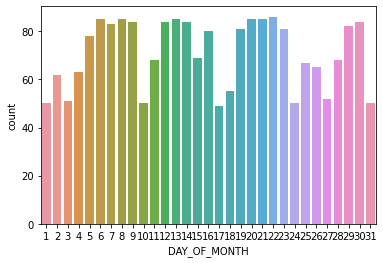

In [30]:
a = sns.countplot(x='DAY_OF_MONTH', data=q2d)

4. Check variable "DEP_TIME". It is a number, but it actually means a time. For instance, 1455 means 14:55 in the afternoon. Create an "Hour' variable that get the hour of the departure time, e.g. 1455 means the hour is 14. (Hint: what mathematical operation can help you get 14 from 1455?) (10 points)

5. Based on the hour, create a new variable "time_of_day" as "day" and "night". You can have your own definition of day and night, e.g. 6-18 as day 19-5 as night. (10 points)

6. Find the number of flights for each pair of DEST and ORIGIN. (Hint: groupby() to identify the unique pairs of DEST and ORIGIN and count records use any other variables). Which two airports have the most flights? (8 points)

7. Change "Flight_Status" to dummies. Create a pivot table that gets the ontime rate based on "Weather" and "DAY_OF_WEEK". "DAY_OF_WEEK" indicates which day of the week the flight is, e.g. 4 means Thursday. (Hint: refer to our titanic example.) (10 points)

8. Find the flights between LGA and DCA. What is their ontime rate? (8 points)

Bonus Questions (15 points)<br>
Take the Google App Playstore again. Instead of using rating, we use a weighted rating that also takes the number of ratings into account. The formula is as follows: WR+(1-W)Ra, R is the rating of the App, Ra is the average rating of all Apps, W is the ratio between the number of ratings for the App and the maximum number of ratings of all Apps.<br>
Create a weighted rating variable based on the formula.